# Transformaciones Geométricas

En esta sección hacemos una breve revision de las transformaciones geométricas espaciales afines de rotación y escala. El proceso de mapeamiento de los valores de la nueva imagen es descrito para las transformaciones mencionadas dependiente o independientemente. Finalmente, comparamos las siguientes interpolaciones: vecino mas próximo, bilinear, bicúbica y de Lagrange.

## Introducción

Dentre las diferentes formas por las cuales las personas pueden interactuar con imagenes, podemos citar ejemplos como: modiﬁcación do grado de inclinación para una foto del curriculum vitae, modiﬁcación da escala de una ﬁgura para colocarla en una tarjeta de cumpleaños, o incluso alteración de la perspectiva de fotos para hacerlas ver mas graciosas, para su perfil en una red social. Todas las tareas citadas anteriormente son realizadas através de transformaciones geométricas espaciales. Tales transformaciones mapean pixels de una dada imagen para una nueva; sin embargo, los valores de esos pixels no serán siempre simplemente compiados, como ocurre en la translación. En la mayoria de los casos, como un aumento do tamaño de una imagen, es necesario interpolar los valores de la imagen original. De lo contrário, cuanto mayor sea la mudanza, mas notoria será la cantidad de detalles perdidos. Existen diferentes tipos de interpolación. Algunos tipos son mas costosos que otros en términos de tiempo computacional; sin embargo, oferecen mejores resultados.

## Objetivos

* Comprender las transformaciones geométicas de: traslación, rotación y escala.
* Implementar las transformaciones geométricas indicadas anteriormente.
* Entender la necesidad de interpolar valores
* Averiguar e implementar los diferentes tipos de interpolacion

## Conceptos

Un número elevado de transformaciones puede ser aplicado en las imágenes. Estas transformaciones exigen dos operaciones: uma transformación espacial para mapear los valores de los pixels en la nueva imagen, y una interpolación que obtiene un nuevo valor a ser mapeado.

In [1]:
#Importando libreias
import cv2
import numpy as np
import dip_lib as dip
import ipywidgets as wg
from IPython.display import display
from matplotlib import pyplot as plt

In [2]:
img = dip.loadImage('color_images/Balloons.jpg', color=False)

###  Transformaciones Geométricas

<img src="TransformacionesGeometricas.png" width="50%" height="50%"/>

En imagenes una transformación geotmétrica puede llevarse a cabo utilizando una matriz homográfica. La transformacion correspondiente a cada pixel se establece de la siguiente forma:

\begin{equation*}
\begin{bmatrix} x' \\  y' \\ z' \\ 1 \\ \end{bmatrix} = 
\begin{bmatrix}
    a & b & c & j \\
    d & e & f & k \\
    g & h & i & l \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}
\times
\begin{bmatrix} x \\  y \\ z \\ 1 \\ \end{bmatrix}
\end{equation*}

In [3]:
def aplicarTransformacion(img, M):
    rows,cols = img.shape
    img_t = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('img',img_t)
    dip.printImage(img_t)

#### Escala

Es la acción de redimencionar la imagen en determinado factor ($s_x, s_y, s_z$).

\begin{equation*}
\begin{bmatrix} x' \\  y' \\ z' \\ 1 \\ \end{bmatrix} = 
\begin{bmatrix}
    s_x & 0   & 0   & 0 \\
    0   & s_y & 0   & 0 \\
    0   & 0   & s_z & 0 \\
    0   & 0   & 0   & 1 \\
\end{bmatrix}
\times
\begin{bmatrix} x \\  y \\ z \\ 1 \\ \end{bmatrix}
\end{equation*}

In [4]:
def escalarImagen(s_x, s_y):
    rows,cols = img.shape
    M = np.float32([[s_x,0,0],[0,s_y,0]])
    img_t = cv2.warpAffine(img,M,(cols*2,rows*2))
    cv2.imshow('img',img_t)
    dip.printImage(img_t)

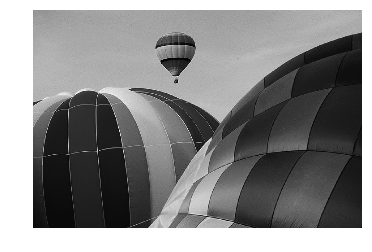

In [5]:
s_x_slider = wg.FloatSlider(value=1, min=0, max=2, step=0.1)
s_y_slider = wg.FloatSlider(value=1, min=0, max=2, step=0.1)
wg.interact(escalarImagen, s_x=s_x_slider, s_y=s_y_slider)

#### Traslación

Es la acción de trasladar cada pixel de la imagen ($f(x,y,z)$) en determinado valor ($t_x, t_y, t_z$).

\begin{equation*}
\begin{bmatrix} x' \\  y' \\ z' \\ 1' \\ \end{bmatrix} = 
\begin{bmatrix}
    1 & 0 & 0 & t_x \\
    0 & 1 & 0 & t_y \\
    0 & 0 & 1 & t_z \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}
\times
\begin{bmatrix} x \\  y \\ z \\ 1 \\ \end{bmatrix}
\end{equation*}

In [16]:
def trasladarImagen(t_x, t_y):
    rows,cols = img.shape
    M = np.float32([[1,0,t_x],[0,1,t_y]])
    img_t = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('img',img_t)
    dip.printImage(img_t)

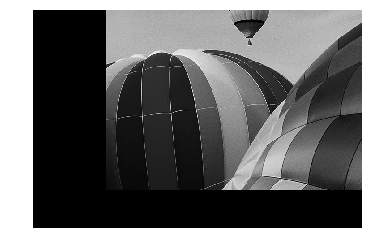

In [17]:
x, y = img.shape
t_x_slider = wg.IntSlider(value=0, min=-x, max=x, step=25)
t_y_slider = wg.IntSlider(value=0, min=-y, max=y, step=25)
wg.interact(trasladarImagen, t_x=t_x_slider, t_y=t_y_slider)

#### Rotación

Es la acción de rotar, un angulo, cada pixel de la imagen ($f(x,y,z)$) en torno a un eje. A continuación se muestra la matriz homografica para efectuar la rotación en torno del eje $z$

\begin{equation*}
\begin{bmatrix} x' \\  y' \\ z' \\ 1 \\
\end{bmatrix} = 
\begin{bmatrix}
    cos(\gamma) & -sen(\gamma) & 0 & 0 \\
    sen(\gamma) &  cos(\gamma) & 0 & 0 \\
         0      &        0     & 1 & 1 \\
         0      &        0     & 0 & 1 \\
\end{bmatrix}
\times
\begin{bmatrix} x \\  y \\ z \\ 1 \\ \end{bmatrix}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
   3 \times cos(45) &  -sen(45)        & 0 & 10 \\
   9 \times sen(45)        & 2 \times cos(45) & 0 & 20 \\
         4              &        0             & 1 & 0 \\
         0              &        0             & 0 & 1 \\
\end{bmatrix}
\end{equation*}

<img src="Rotacion.png" width="25%" height="25%"/>

In [32]:
def rotarImagen(gamma):
    rows,cols = img.shape
    gamma = gamma*np.pi/180 #convirtiendo a radianes
    #M = np.float32([[np.cos(gamma),-np.sin(gamma),np.ceil(cols)],[np.sin(gamma),np.cos(gamma),np.ceil(rows*1.5)]])
    M = np.float32([[np.cos(gamma),-np.sin(gamma),0],
                    [np.sin(gamma),np.cos(gamma),0]])
    img_t = cv2.warpAffine(img,M,(cols,rows ))
    cv2.imshow('img',img_t)
    dip.printImage(img_t)

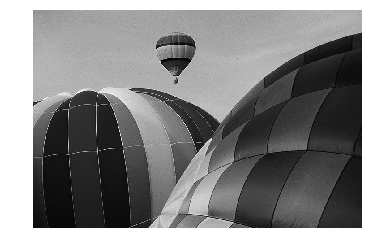

In [33]:
gamma_slider = wg.IntSlider(value=0, min=0, max=360, step=10)
wg.interact(rotarImagen, gamma=gamma_slider)

#### Deformacion

Es el acto deformar la imagen en funcion a uno o mas ejes. A continuación se muestra la matriz homografica para efectuar la deformación en torno del eje $y$

\begin{equation*}
\begin{bmatrix} x' \\  y' \\ z' \\ 1' \\ \end{bmatrix} = 
\begin{bmatrix}
     1  & 0 & 0 & 0 \\
    d_y & 1 & 0 & 0 \\
    d_z & 0 & 1 & 0 \\
     0  & 0 & 0 & 1 \\
\end{bmatrix}
\times
\begin{bmatrix} x \\  y \\ z \\ 1 \\ \end{bmatrix}
\end{equation*}

In [41]:
def deformarImagen(dy):
    rows,cols = img.shape
    M = np.float32([[1,dy,cols],[0,1,rows]])
    img_t = cv2.warpAffine(img,M,(cols*4,rows*4))
    cv2.imshow('img',img_t)
    dip.printImage(img_t)

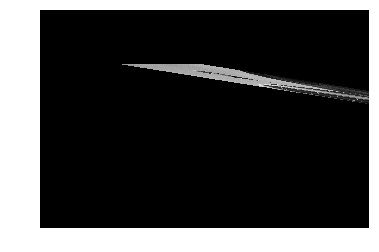

In [42]:
dy_slider = wg.FloatSlider(value=0, min=-10, max=10, step=0.05)
wg.interact(deformarImagen, dy=dy_slider)

### Interpolaciones

#### Vecino mas próximo

*Escribir aqui el concepto que describe esta interpolación*

\begin{equation*}
f(x',y')=
\begin{cases}
f(x,y), & para & d_x < 0.5&y&d_y < 0.5 \\
f(x+1,y), & para & d_x \geq 0.5&y&d_y < 0.5 \\
f(x,y+1), & para & d_x < 0.5&y&d_y \geq 0.5 \\
f(x+1,y+1), & para & d_x \geq 0.5&y&d_y \geq 0.5 \\
\end{cases}
\end{equation*}
Donde:
\begin{equation*}
d_x = x' - x \\
d_y = y' - y \\
\end{equation*}
o simplemente:
\begin{equation*}
f(x',y')=f(round(x),round(y))
\end{equation*}

In [12]:
#TODO: Mostrar un ejemplo de esta interpolación

#### Bilinear

*Escribir aqui el concepto que describe esta interpolación*

\begin{equation*}

f(x',y')=(1-d_x)(1-d_y)f(x,y)+\\
          d_x(1-d_y)f(x+1,y)+\\
          (1-d_x)d_yf(x,y+1)+\\
          d_xd_yf(x+1,y+1)
\end{equation*}

In [13]:
#TODO: Mostrar un ejemplo de esta interpolación

#### Bicúbica

*Escribir aqui el concepto que describe esta interpolación*

*Indicar aqui las ecuaciones en formato $\LaTeX$ para calcular la interpolacion*

In [14]:
#TODO: Mostrar un ejemplo de esta interpolación

#### Polinómios de Lagrange

*Escribir aqui el concepto que describe esta interpolación*

*Indicar aqui las ecuaciones en formato $\LaTeX$ para calcular la interpolacion*

In [15]:
#TODO: Mostrar un ejemplo de esta interpolación